# Task-1
part -> a

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.integrate import solve_ivp

In [114]:
# Gillespie algorithm
def dwell_t_simltn(k_plus, k_minus, int_state = 0, events = 10):
  t = 0
  t_cum = [t]
  State = [int_state] # 0 when closed and 1 when open
  T_close = []
  T_open = []
  for i in range(events):
    r = np.random.rand()
    tau_c  = (1/k_plus)*(np.log(1/r))
    tau_o  = (1/k_minus)*(np.log(1/r))

    if State[-1] == 0:
      t = t + tau_c
      t_cum.append(t)
      State.append(1)
      T_close.append(tau_c)
    else:
      t = t + tau_o
      t_cum.append(t)
      State.append(0)
      T_open.append(tau_o)
  return t_cum,State,T_close,T_open


Intial State is considered to be closed
Time interval covered : 113.82


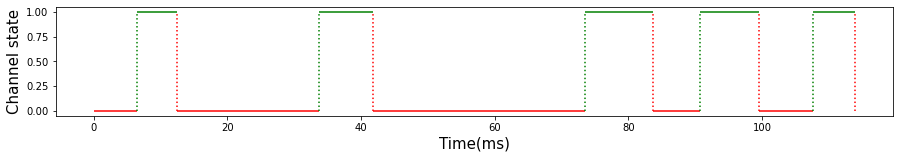

In [351]:
# plt.figure(figsize = (15,2))
# plt.plot(t_cum, State, color = 'r', drawstyle='steps-post')

print("Intial State is considered to be closed") # change in the function calling below

cum_time,state_vec,tau_close,tau_open = dwell_t_simltn(k_plus = 0.1,k_minus = 0.4,int_state = 0,events=10)
print("Time interval covered :", round(cum_time[-1],2))
plt.figure(figsize = (15,2))
for id, i in enumerate(cum_time[:-1]):
  st = state_vec[id]
  col = {0:'r',1:'g'}
  op_st = [i for i in list(col.keys()) if i != st ][0]
  plt.hlines(y=st, xmin=i, xmax=cum_time[id+1], colors=col[st])
  plt.vlines(x=cum_time[id+1], ymin=0, ymax=1, ls = ':',color = col[op_st])  
plt.xlabel('Time(ms)',fontsize=15)
plt.ylabel('Channel state',fontsize=15)
plt.show()

part -> b

In [264]:
k_pl = 0.1
k_min = 0.4
no_events = 10000
intital_state = 0
t_cum,_,tau_close,tau_open = dwell_t_simltn(k_pl,k_min,intital_state,no_events)
exp_tau_close = 1/k_pl
exp_tau_open = 1/k_min
avg_tau_close = np.mean(tau_close)
avg_tau_open = np.mean(tau_open)

print("For {} number of events, total Time Interval considered is {}s".format(no_events,round(t_cum[-1]/1000,2)))
print("Average closed dwell time = {}, and the Expected Value is {}".format(round(avg_tau_close,2),exp_tau_close))
print("Average open dwell time = {}, and the Expected Value is {}".format(round(avg_tau_open,2),exp_tau_open))

For 10000 number of events, total Time Interval considered is 62.59s
Average closed dwell time = 10.02, and the Expected Value is 10.0
Average open dwell time = 2.5, and the Expected Value is 2.5


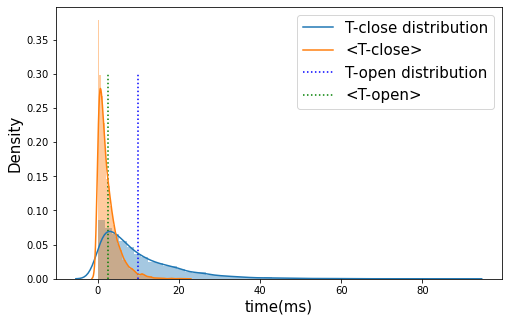

In [338]:
# distribution of both open and closed dwell time along with corresponding expected values
plt.figure(figsize = (8,5))
sns.distplot(tau_close)
plt.vlines(x=exp_tau_close,ls=':',ymin = 0,ymax=0.3,color = 'b')
sns.distplot(tau_open)
plt.vlines(x=exp_tau_open,ls=':',ymin = 0,ymax=0.3,color = 'g')
plt.legend(['T-close distribution','<T-close>','T-open distribution','<T-open>'],fontsize=15)
plt.xlabel('time(ms)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.show()

part -> c

In [511]:
np.histogram(tau_n)

(array([13, 11,  6, 10,  6,  1,  1,  0,  0,  2]),
 array([3.64415162e+01, 4.39888272e+03, 8.76132393e+03, 1.31237651e+04,
        1.74862064e+04, 2.18486476e+04, 2.62110888e+04, 3.05735300e+04,
        3.49359712e+04, 3.92984124e+04, 4.36608536e+04]))

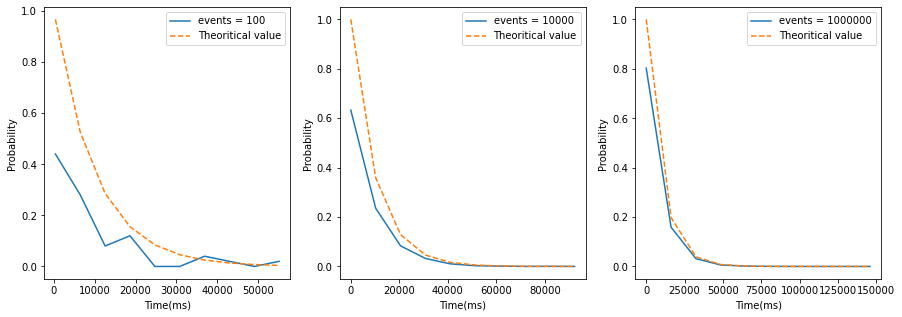

In [551]:
# Tau = n*del_t
plt.figure(figsize = (15,5))
for id,i in enumerate([100,10000,1000000]):
    t_cum,_,tau_close,tau_open = dwell_t_simltn(k_pl,k_min,intital_state,i)

    del_t = 0.001
    tau_n = np.array(tau_close)/del_t
    den,time = np.histogram(tau_n)
    plt.subplot(1,3,id+1)
    plt.plot(time[:-1],den/len(tau_n))
    plt.plot(time[:-1],np.exp(-k_pl*np.array(time[:-1])*del_t),linestyle='--') 
    plt.legend(['events = {}'.format(i),'Theoritical value'])
    plt.xlabel('Time(ms)')
    plt.ylabel('Probability')


plt.show()
# plotting the theoritical expected value
# plt.plot(tau_sort,sim_n(tau_sort,10))
# plt.plot(tau_sort,sim_n(tau_sort,30))
# plt.xlabel('Tau',fontsize=15)
# plt.ylabel('Probability',fontsize=15)
# plt.legend(['Theoritical','Simulated_10','Simulated_30'],fontsize=15)
# plt.show()

part -> d

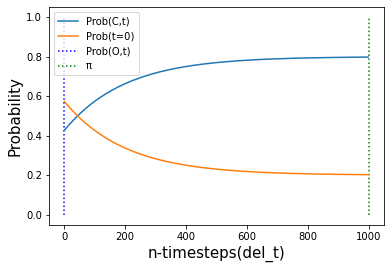

In [192]:
del_t = 0.01 # intialization of delta T
# formulating Q
Q = np.zeros((2,2))
Q[0,0] = 1-k_pl*del_t
Q[0,1] = k_min*del_t
Q[1,0] = k_pl*del_t
Q[1,1] = 1-k_min*del_t

prob_c = np.random.rand() # randomly intializing the probability of channel is closed at t=0
P = np.array([prob_c,1-prob_c]) # state
P_list = []
for n in range(1,1000): # iterating for n = 1000
  P = np.matmul(Q,P)
  P_list.append(P)

p_c = []
p_o = []
for p in P_list:
  p_c.append(p[0])
  p_o.append(p[1])
# plotting the states at different value of time. Converges at larger value of t.
plt.plot(p_c)
plt.vlines(x=0,ymin = 0,ymax=1,ls = ':',color = 'b')
plt.plot(p_o)
plt.vlines(x=1000,ymin = 0,ymax=1,ls = ':',color = 'g')
plt.xzzlabel('Probability',fontsize=15)
plt.xlabel('n-timesteps(del_t)',fontsize=15)
plt.legend(['Prob(C,t)','Prob(t=0)','Prob(O,t)','π'])
plt.show()

In [235]:
#cross checking the condition π = Qπ
print("π = ",P_list[-1])
print("Qπ = ",np.matmul(Q,P_list[-1]))

π =  [0.79749551 0.20250449]
Qπ =  [0.79750804 0.20249196]


# Task-2
part -> a

In [595]:
#Gillespie's Algorithm for N=3 reactions
N =  3
k_pl,k_mi,k_m,M_ext = 0.1,0.4,5,1.2 # parameters
C_ls = [1] # Assumed channel to be closed in the start
O_ls = [0] 
M_ls = [0] # number of intercellular molecules is zero
t = 0
t_ls = [t] 

while M_ls[-1]<=50: # Iterates untill number of intercellular molecules reaches this value 
  
  #intialization fo random values
  r1 = np.random.rand()
  r2 = np.random.rand()
  
  # alpha_0 -> sum of propensity functions
  alpha_0 = k_pl*C_ls[-1] + k_mi*O_ls[-1] + k_m*M_ext*O_ls[-1]
  
  tau = np.log(1/r1)/alpha_0
  t  =  t + tau
  t_ls.append(t)

  req_sum = 0 # Iteratively finds the smallest J values using r2
  for j in range(1,N+1):
    prev_sum = req_sum
    if j ==1 : req_sum += k_pl*C_ls[-1]
    elif j ==2 : req_sum += k_mi*O_ls[-1]
    else : req_sum += k_m*M_ext*O_ls[-1]

    if (r2 >= prev_sum/alpha_0) and (r2 < req_sum/alpha_0):
      reac_j = j
      break;
      
  # updating reactants and products accroding the J value from above
  if reac_j ==1 :
    C_ls.append(C_ls[-1]-1)
    O_ls.append(O_ls[-1]+1)
    M_ls.append(M_ls[-1])
  elif reac_j ==2 :
    C_ls.append(C_ls[-1]+1)
    O_ls.append(O_ls[-1]-1)
    M_ls.append(M_ls[-1])
  else:
    C_ls.append(C_ls[-1])
    O_ls.append(O_ls[-1])
    M_ls.append(M_ls[-1]+1)

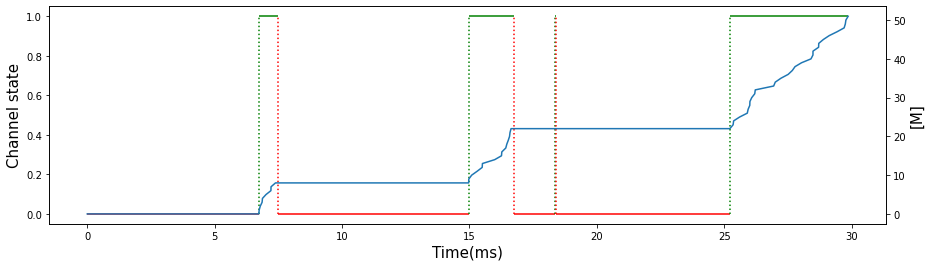

In [596]:
cum_time = t_ls
state_ls = []
for idx, C in enumerate(C_ls): # updating the state value for plotting
  if C==1:
    state_ls.append(0)
  elif O_ls[idx] == 1:
    state_ls.append(1)
  else:
    print("something wrong")
    
fig, ax1 = plt.subplots(figsize = (15,4))
ax2 = ax1.twinx()
for id, i in enumerate(cum_time[:-1]):
  st = state_ls[id]
  col = {0:'r',1:'g'}
  op_st = [i for i in list(col.keys()) if i != st ][0]
  ax1.hlines(y=st, xmin=i, xmax=cum_time[id+1], colors=col[st])
  if st!=state_ls[id+1]:
    ax1.vlines(x=cum_time[id+1], ymin=0, ymax=1,ls = ':',color = col[op_st])  
ax1.set_xlabel('Time(ms)',fontsize =15)
ax1.set_ylabel('Channel state',fontsize =15)

ax2.plot(cum_time,M_ls)
ax2.set_ylabel("[M]",fontsize =15)
plt.show()

part -> b(i)

In [301]:
#Gillespie's Algorithm for N=4 reactions
N =  4
k_pl,k_mi,k_m,M_ext,k_d = 0.1,0.4,5,1.2,0.1 # parameters
C_ls = [1] # Assumed channel to be closed in the start
O_ls = [0]
M_ls = [0] # number of intercellular molecules is zero
t = 0
t_ls = [t]

while M_ls[-1]<=40: # Iterates untill number of intercellular molecules reaches this value 
  
  #intialization fo random values
  r1 = np.random.rand()
  r2 = np.random.rand()
  
  # alpha_0 -> sum of propensity functions
  alpha_0 = k_pl*C_ls[-1] + k_mi*O_ls[-1] + k_m*M_ext*O_ls[-1] + k_d*M_ls[-1]
  
  tau = np.log(1/r1)/alpha_0
  t  =  t + tau
  t_ls.append(t)

  req_sum = 0
  for j in range(1,N+1): # Iteratively finds the smallest J values using r2
    prev_sum = req_sum
    if j == 1 : req_sum += k_pl*C_ls[-1]
    elif j == 2 : req_sum += k_mi*O_ls[-1]
    elif j== 3 : req_sum += k_m*M_ext*O_ls[-1]
    else : req_sum += k_d*M_ls[-1]

    if (r2 >= prev_sum/alpha_0) and (r2 < req_sum/alpha_0):
      reac_j = j
      break;
        
  # updating reactants and products accroding the J value from above   
  if reac_j == 1 :
    C_ls.append(C_ls[-1]-1)
    O_ls.append(O_ls[-1]+1)
    M_ls.append(M_ls[-1])
  elif reac_j == 2 :
    C_ls.append(C_ls[-1]+1)
    O_ls.append(O_ls[-1]-1)
    M_ls.append(M_ls[-1])
  elif reac_j == 3:
    C_ls.append(C_ls[-1])
    O_ls.append(O_ls[-1])
    M_ls.append(M_ls[-1]+1)
  else: # condition for 4th reaction
    C_ls.append(C_ls[-1])
    O_ls.append(O_ls[-1])
    M_ls.append(M_ls[-1]-1)

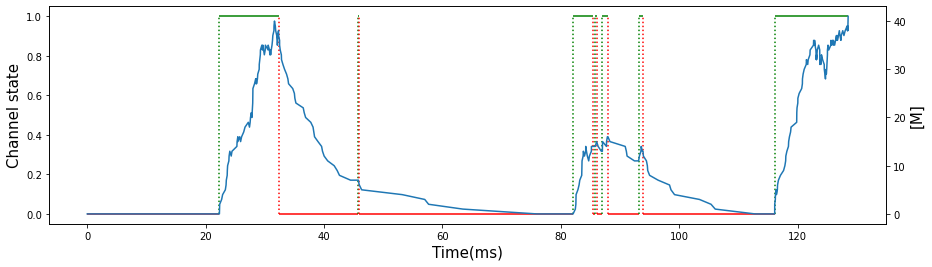

In [303]:
cum_time = t_ls # updating the state value for plotting
state_ls = []
for idx, C in enumerate(C_ls):
  if C==1:
    state_ls.append(0)
  elif O_ls[idx] == 1:
    state_ls.append(1)
  else:
    print("something wrong")

fig, ax1 = plt.subplots(figsize = (15,4))
ax2 = ax1.twinx()
for id, i in enumerate(cum_time[:-1]):
  st = state_ls[id]
  col = {0:'r',1:'g'}
  op_st = [i for i in list(col.keys()) if i != st ][0]
  ax1.hlines(y=st, xmin=i, xmax=cum_time[id+1], colors=col[st])
  if st!=state_ls[id+1]:
    ax1.vlines(x=cum_time[id+1], ymin=0, ymax=1,ls = ':',color = col[op_st])  
ax1.set_xlabel('Time(ms)',fontsize =15)
ax1.set_ylabel('Channel state',fontsize =15)

ax2.plot(cum_time,M_ls)
ax2.set_ylabel("[M]",fontsize =15)
plt.show()

part -> b(ii)

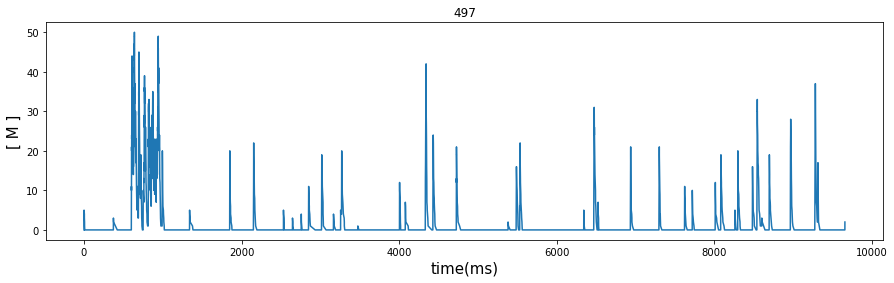

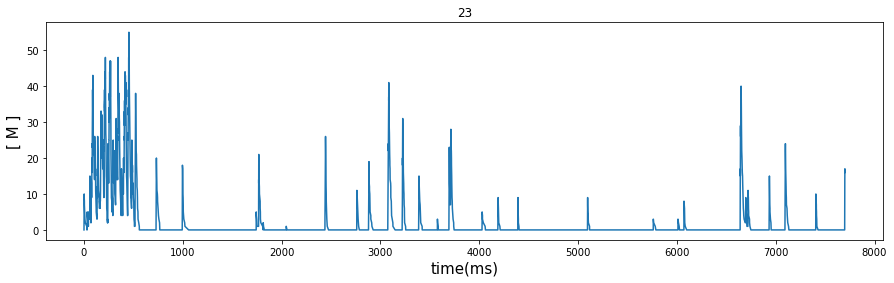

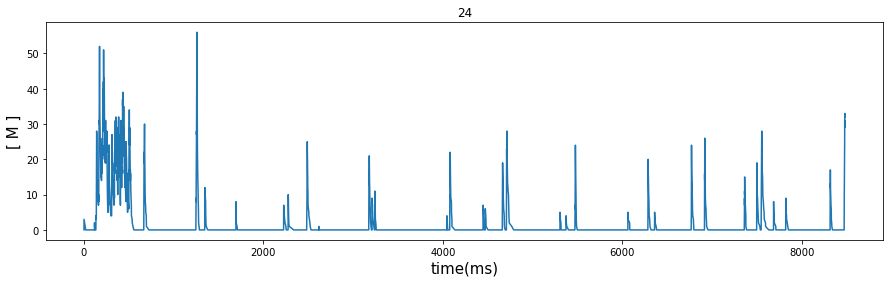

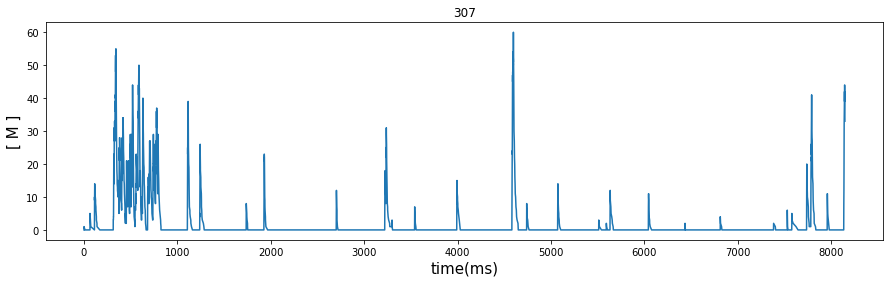

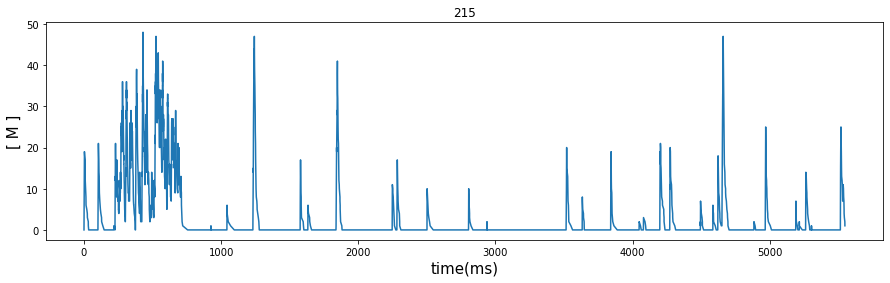

In [289]:
for sim in range(5): # plotting for 5 different simulation
    N =  4
    k_mi,k_m,M_ext,k_d = 0.4,5,1.2,0.1
    h = 4
    C_ls = [0]
    O_ls = [1]
    M_ls = [0]
    t = 0
    t_ls = [t]
    j_ls = []
    U_t = np.random.randint(0,500)
    #while M_ls[-1]<=200:
    for itr in range(3000):
      # 
      if t < U_t or t > U_t+500: # time condition for voltage regulation
        U = -80
      else:
        U = -15
      k_pl = (0.2*(U + 100)**h)/(50**h + ((U + 100)**h))

      r1 = np.random.rand()
      r2 = np.random.rand()
      alpha_0 = k_pl*C_ls[-1] + k_mi*O_ls[-1] + k_m*M_ext*O_ls[-1] + k_d*M_ls[-1]
      tau = np.log(1/r1)/alpha_0
      t  =  t + tau
      t_ls.append(t)

      req_sum = 0
      for j in range(1,N+1):
        prev_sum = req_sum
        if j == 1 : req_sum += k_pl*C_ls[-1]
        elif j == 2 : req_sum += k_mi*O_ls[-1]
        elif j== 3 : req_sum += k_m*M_ext*O_ls[-1]
        else : req_sum += k_d*M_ls[-1]

        if (r2 >= prev_sum/alpha_0) and (r2 < req_sum/alpha_0):
          reac_j = j
          break;

      j_ls.append(reac_j)
      if reac_j == 1 :
        C_ls.append(C_ls[-1]-1)
        O_ls.append(O_ls[-1]+1)
        M_ls.append(M_ls[-1])
      elif reac_j == 2 :
        C_ls.append(C_ls[-1]+1)
        O_ls.append(O_ls[-1]-1)
        M_ls.append(M_ls[-1])
      elif reac_j == 3:
        C_ls.append(C_ls[-1])
        O_ls.append(O_ls[-1])
        M_ls.append(M_ls[-1]+1)
      else:
        C_ls.append(C_ls[-1])
        O_ls.append(O_ls[-1])
        M_ls.append(M_ls[-1]-1)

    cum_time = t_ls
    plt.figure(figsize=(15,4))
    plt.plot(cum_time,M_ls)
    plt.xlabel('time(ms)',fontsize =15)
    plt.ylabel('[ M ]',fontsize =15)
    plt.title(U_t)

# Task - 3 

In [37]:
# def k_x_y (k0,ka,A,khalf):
#     return k0 + ka*A/(khalf+A)
# function definition for all the ODE's
def kaiC_system(t,z,kaiC,kaiA,khalf,m,param_dict):
    T,D,S = z
    U = kaiC - (T+D+S)
    A = max(0,kaiA-2*m*S)
    k_ut,k_dt = param_dict['ut'][0] + (param_dict['ut'][1]*A)/(khalf+A) , param_dict['dt'][0] + (param_dict['dt'][1]*A)/(khalf+A)
    k_tu,k_td =  param_dict['tu'][0] + (param_dict['tu'][1]*A)/(khalf+A) , param_dict['td'][0] + (param_dict['td'][1]*A)/(khalf+A)
    k_sd,k_ds =  param_dict['sd'][0] + (param_dict['sd'][1]*A)/(khalf+A) , param_dict['ds'][0] + (param_dict['ds'][1]*A)/(khalf+A)
    k_us,k_su =  param_dict['us'][0] + (param_dict['us'][1]*A)/(khalf+A) , param_dict['su'][0] + (param_dict['su'][1]*A)/(khalf+A)
    
    return [k_ut*U + k_dt*D-(k_tu+k_td)*T,
            k_td*T +k_sd*S-(k_dt+k_ds)*D,
            k_us*U + k_ds*D -(k_su+k_sd)*S]

In [38]:
# Parameters initiallization 
kaiA =1.3
kaiC =3.4
m=1
khalf = 0.43
param_dict = {'ut':[0,0.479077],'tu':[0.21,0.0798462], # Dictionary mapping of Coefficient with K_0 and K_A 
             'dt':[0,0.173],'td':[0,0.212923],
             'sd':[0,0.505692],'ds':[0.31,-0.319385],
              'us':[0,0.0532308],'su':[0.11,-0.133077]}
sol = solve_ivp(kaiC_system, [0, 150],[0.68,1.36, 0.34],args=(kaiC,kaiA,khalf,m,param_dict), dense_output=True, method = 'RK45')

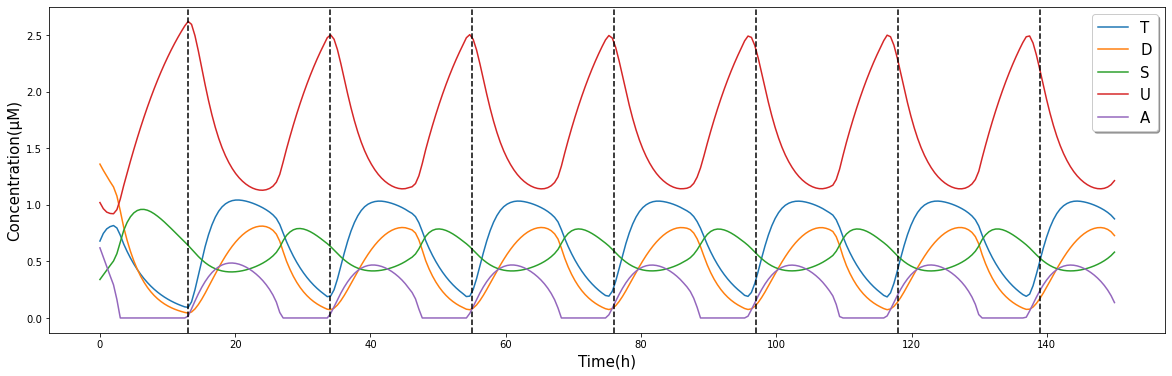

In [39]:
# Plot concentration of T, D, S, U, A with time. which is found to be cyclic with period ~21 hrs
t = np.linspace(0,150, 300)
z = sol.sol(t)
U_ls,A_ls = [],[]
for ls in z.T:
    U = kaiC - sum(ls)
    A = max(0,kaiA-2*m*ls[2])
    U_ls.append(U)
    A_ls.append(A)
    
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(t, z.T)
plt.plot(t,U_ls)
plt.plot(t,A_ls)
for i in range(13,150,21):
    plt.axvline(x=i,linestyle='--',color='black')
plt.xlabel('Time(h)',fontsize = 15)
plt.ylabel('Concentration(μM)',fontsize = 15)
plt.legend(['T', 'D','S','U','A'], shadow=True,fontsize = 15)
plt.show()

Finding Period of the oscillation

In [40]:
y = z[2]
x = t 
slope = list(np.diff(y)/np.diff(x)) # calculating slope of one of the monomer's concentration

i = 0
peak_inx = []
time_idx = []
# storing all the indexes where the slope of concentration is changing
for idx in range(1,len(slope)):
    if slope[idx]*slope[idx-1] < 0: 
        peak_inx.append(idx)
        time_idx.append(t[idx])

In [41]:
# alternative indexes will give the position of all the troughs in the concentration trend. 
# then mean of differences of time at those indexes will give the period.
np.mean(np.diff(time_idx[::2]))

21.070234113712374